# 1. K-최근접 이웃


일단 별도의 트레이닝 방식은 그냥 데이터셋을 저장하는 게 전부다! 새로운 데이터 포인트를 예측할 때는 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 "최근접 이웃"을 찾는다. 

In [1]:
import mglearn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


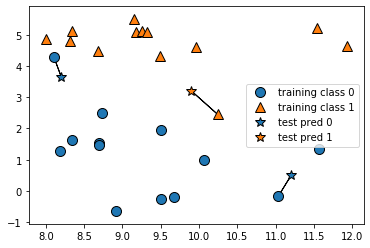

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

? 별표를 무슨 기준으로 배치하는건가!? x, y축 특성을 어떤 식으로 고려한건지! 

? 클래스 분류가 끝난 현실의 데이터를 별표처럼 이렇게 넣는건가!? 아니면, 삼각형이랑 똥그라미가 이미 분류가 된건가!? 그래서 별표가 테스트데이터고, 삼각형이랑 똥그라미가 이미 트레인데이터인가?

### 테스트 데이터 가져오기!
### train, test 데이터로 분리하기!

In [6]:
!pip install mglearn
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


### KNeighborsClassifier(n_neighbors=3) 

면적에 테스트 데이터가 들어올 때, 이 면적에 속하면, 해당 면적의 클래스가 된다! 

In [1]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [10]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [19]:
path = 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)


NanumGothic


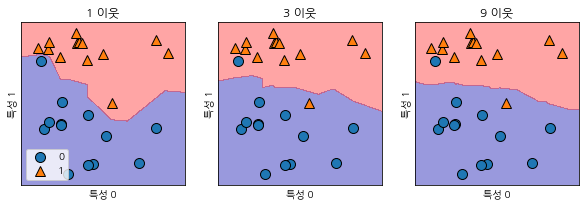

In [20]:

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환한다. 
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있다. 
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, 
                                   alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

axes[0].legend(loc=3)

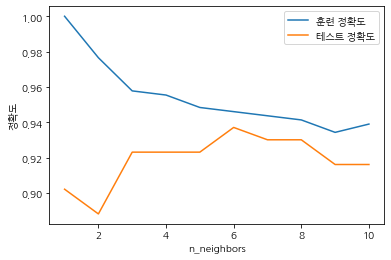

In [23]:
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)


for n_neighbors in neighbors_settings:
    # 모델 생성
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

    

? 모델이 단순하다
? 모델이 복잡하다
? 왜 중간이 가장 좋다고들 하는 건가?

### 회귀 분석에서도 쓰인다! 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


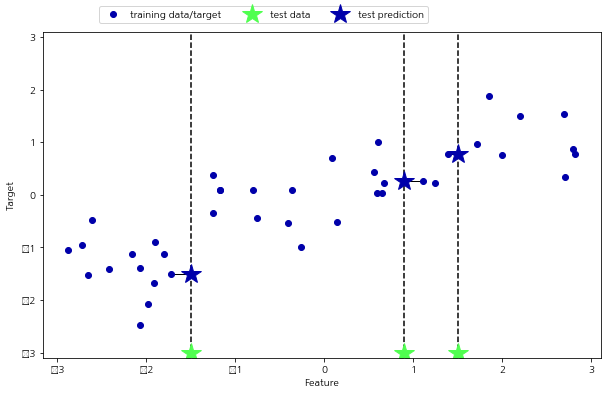

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


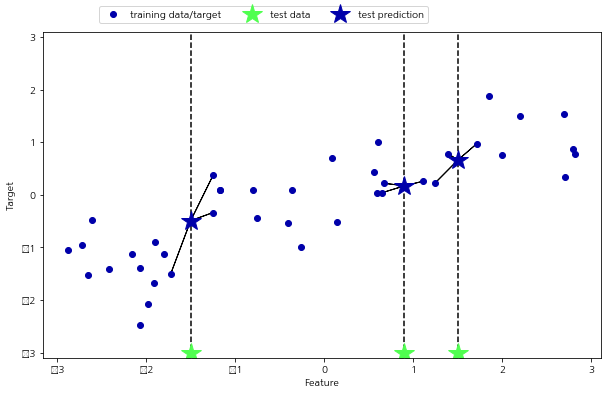

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [35]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [36]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


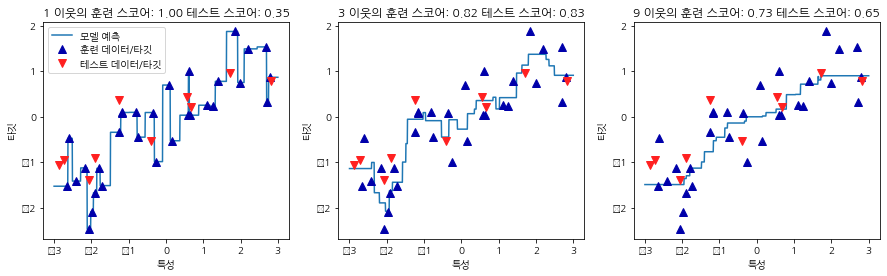

In [38]:
import numpy as np


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃",
                "테스트 데이터/타깃"], loc="best")
    
    

### KNeighbors 분류기에 중요한 매개변수는 두 개입니다. 

1. 데이터 포인트 사이의 거리를 재는 방법
2. 이웃의 수

특성이 많은 데이터들은 잘 동작하지 않으며, 특성 값이 대부분인 0의 데이터에서는 또 잘 동작하지 않는다!


<br>


예측이 느리고, 많은 특성을 처리하는 능력이 부족해서 현업에서는 잘 쓰지 않는다. 이런 단점이 없는 알고리즘이 다음에 설명할 선형 모델이다! 
